# Business Objective: Online Course Recommendation System
## Problem Statement
The goal of this dataset is to build an online course recommendation system that suggests relevant courses to learners based on their interests, past enrollments, and engagement levels. The dataset includes course ratings, instructor information, previous learning history, study material availability, and certification offerings, making it suitable for recommendation models using collaborative filtering, content-based filtering, or hybrid approaches.

## Variable Descriptions
    Variable Name -- Data Type -- Description
    user_id -- Integer -- Unique identifier for each learner.
    course_id -- Integer -- Unique identifier for each online course.
    course_name -- String -- The name of the online course.
    instructor -- String -- The name of the instructor teaching the course.
    course_duration_hours -- Float (5.0 - 100.0) -- The duration of the course in hours.
    certification_offered -- String (Yes/No) -- Indicates whether the course provides a certification upon completion.
    difficulty_level -- String -- The difficulty level of the course (Beginner, Intermediate, Advanced).
    rating -- Float (1.0 - 5.0) -- User-provided rating for the course.
    enrollment_numbers -- Integer -- The total number of students enrolled in the course.
    course_price -- Float (20.0 - 500.0) -- The price of the online course.
    feedback_score -- Float (0.0 - 1.0) -- A normalized score representing the feedback sentiment from students.
    study_material_available -- String (Yes/No) -- Indicates whether additional study materials are available.
    time_spent_hours -- Float (1.0 - 100.0) -- The average time spent by students in the course (in hours).
    previous_courses_taken -- Integer -- The number of previous courses the learner has taken before enrolling in this one.


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!pip install openpyxl

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving online_course_recommendation_v2 (1).xlsx to online_course_recommendation_v2 (1).xlsx


In [ ]:
df= pd.read_excel('online_course_recommendation_v2 (1).xlsx')
df.head()

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken
0,15796,9366,Python for Beginners,Emma Harris,39.1,Yes,Beginner,5.0,21600,317.50,0.797,Yes,17.60,4
1,861,1928,Cybersecurity for Professionals,Alexander Young,36.3,Yes,Beginner,4.3,15379,40.99,0.770,Yes,28.97,9
2,38159,9541,DevOps and Continuous Deployment,Dr. Mia Walker,13.4,Yes,Beginner,3.9,6431,380.81,0.772,Yes,52.44,4
3,44733,3708,Project Management Fundamentals,Benjamin Lewis,58.3,Yes,Beginner,3.1,48245,342.80,0.969,No,22.29,6
4,11285,3361,Ethical Hacking Masterclass,Daniel White,30.8,Yes,Beginner,2.8,34556,381.01,0.555,Yes,22.01,5


In [ ]:
df.shape

(100000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   100000 non-null  int64  
 1   course_id                 100000 non-null  int64  
 2   course_name               100000 non-null  object 
 3   instructor                100000 non-null  object 
 4   course_duration_hours     100000 non-null  float64
 5   certification_offered     100000 non-null  object 
 6   difficulty_level          100000 non-null  object 
 7   rating                    100000 non-null  float64
 8   enrollment_numbers        100000 non-null  int64  
 9   course_price              100000 non-null  float64
 10  feedback_score            100000 non-null  float64
 11  study_material_available  100000 non-null  object 
 12  time_spent_hours          100000 non-null  float64
 13  previous_courses_taken    100000 non-null  in

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
df.isnull().sum()

,0
user_id,0
course_id,0
course_name,0
instructor,0
course_duration_hours,0
certification_offered,0
difficulty_level,0
rating,0
enrollment_numbers,0
course_price,0


In [ ]:
df['course_taken']= df.groupby('user_id')['user_id'].transform('count')

In [ ]:
df1= df.sort_values(by= 'user_id', ascending= True).reset_index(drop= True)
display(df1)

,user_id,course_id,course_name,instructor,course_duration_hours,certification_offered,difficulty_level,rating,enrollment_numbers,course_price,feedback_score,study_material_available,time_spent_hours,previous_courses_taken,course_taken
0,1,78,Photography and Video Editing,Dr. Mia Walker,62.5,Yes,Beginner,3.9,47116,431.78,0.680,Yes,37.56,4,1
1,2,4319,Advanced Machine Learning,Prof. Emily Johnson,15.7,Yes,Beginner,3.3,15753,83.43,0.646,Yes,1.59,2,5
2,2,5292,Data Visualization with Tableau,Alexander Young,41.4,Yes,Beginner,4.5,9611,160.56,0.805,Yes,19.89,0,5
3,2,2021,Blockchain and Decentralized Applications,Dr. Robert Davis,13.9,No,Advanced,4.5,41708,56.71,0.978,Yes,1.00,2,5
4,2,621,Python for Beginners,Prof. Emily Johnson,21.7,No,Beginner,4.6,27318,352.27,0.873,Yes,20.46,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,49997,8354,Fitness and Nutrition Coaching,Olivia Taylor,82.1,No,Beginner,4.5,6701,107.74,0.614,Yes,24.57,3,2
99996,49997,5280,Fitness and Nutrition Coaching,Olivia Taylor,22.7,Yes,Advanced,5.0,48889,182.05,0.733,Yes,15.51,5,2
99997,49998,1392,Public Speaking Mastery,Daniel White,31.5,Yes,Beginner,5.0,8327,32.07,0.629,Yes,9.41,5,2
99998,49998,2740,Python for Beginners,William Thomas,5.9,Yes,Intermediate,4.4,19863,174.51,0.755,Yes,1.00,6,2


In [ ]:
df.drop('previous_courses_taken', axis= 1, inplace= True)

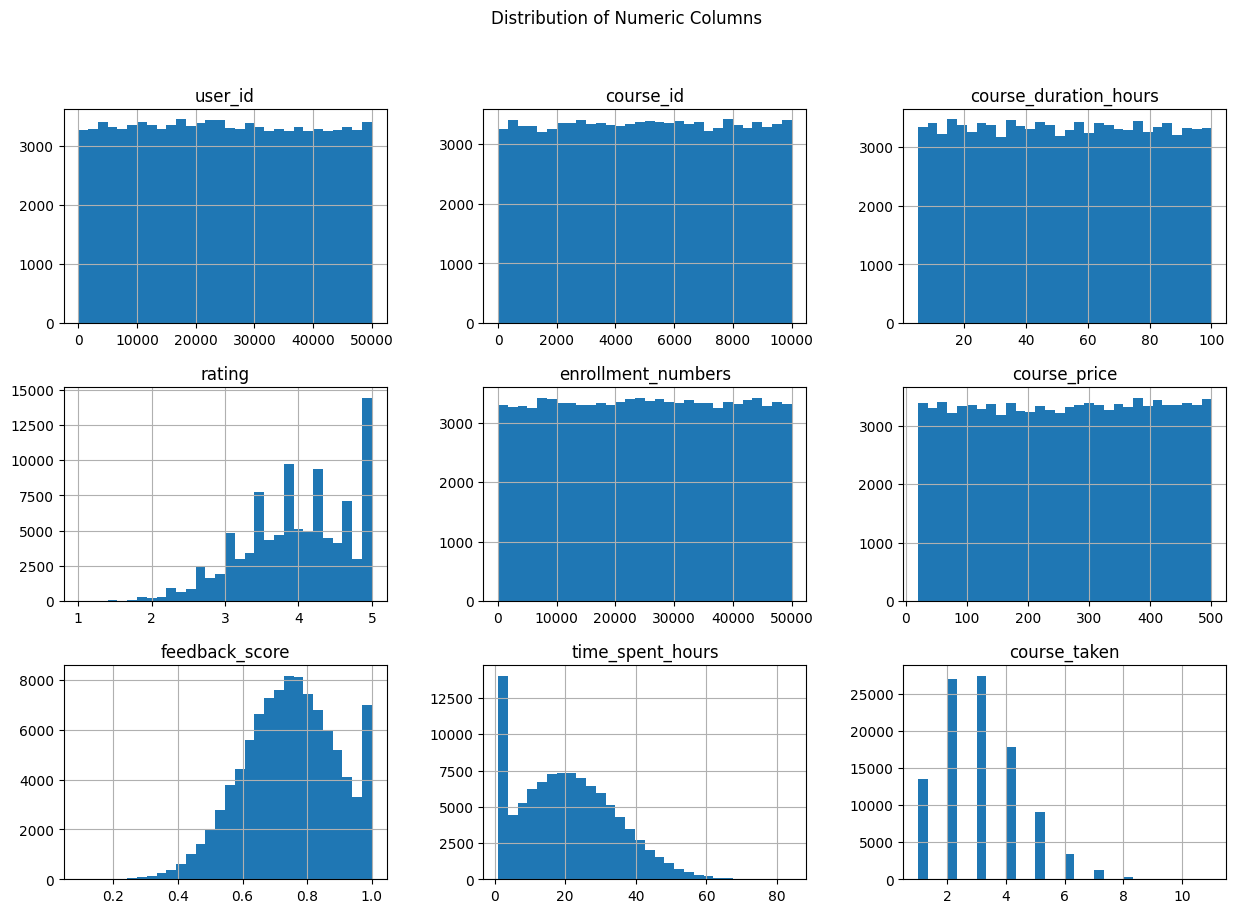

In [ ]:
df.hist(bins=30, figsize=(15,10))
plt.suptitle("Distribution of Numeric Columns")
plt.show()

In [ ]:
# # Selecting numeric columns
# numeric_cols= df.select_dtypes(include= ['float64', 'int64']).columns

# df_clean= df.copy()

# # Loop through each num cols
# for col in numeric_cols:
#   Q1= df[col].quantile(0.25)
#   Q3= df[col].quantile(0.75)
#   IQR= Q3- Q1
#   lower= Q1 - 1.5 * IQR
#   upper= Q3 + 1.5 * IQR
#   outliers= df[(df[col] < lower) | (df[col] > upper)]
#   print(f"{col}: {len(outliers)} outliers")

#   # Keep ionly rows within bounds
#   df_clean= df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# print('original shape: ', df.shape)
# print('After removing outliers:', df_clean.shape)

In [ ]:
# df_clean.hist(bins=30, figsize=(15,10))
# plt.suptitle("Distribution of Numeric Columns")
# plt.show()

# EDA

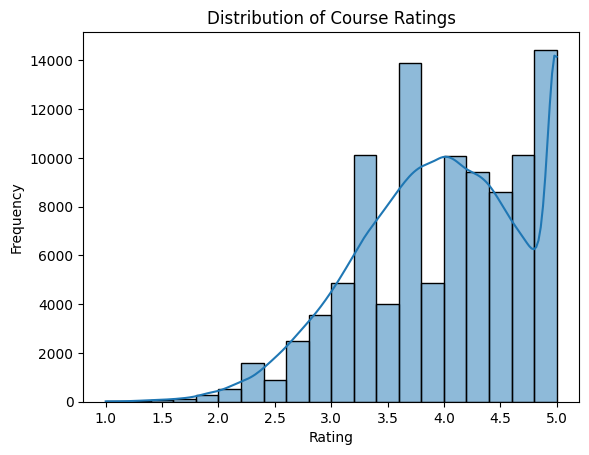

In [ ]:
# 1. Distribution of Course Ratings
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Course Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

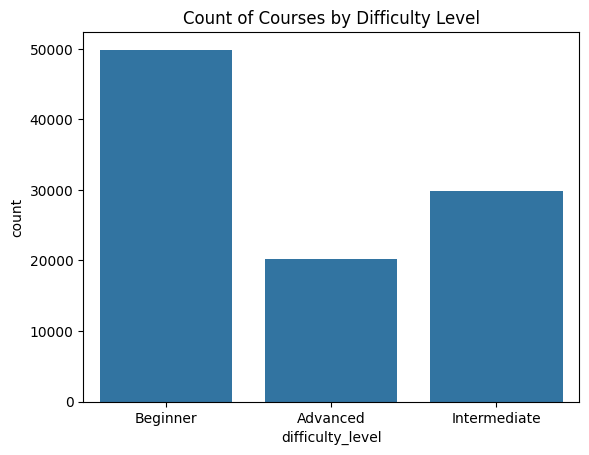

In [ ]:
# 2. Difficulty levels
sns.countplot(x='difficulty_level', data= df)
plt.title('Count of Courses by Difficulty Level')
plt.show()

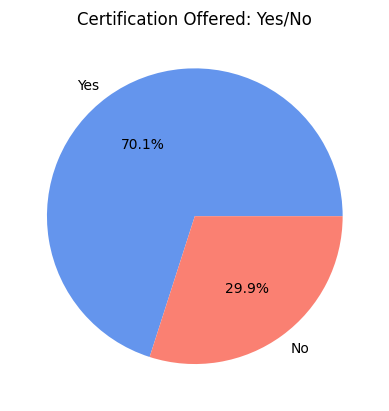

In [ ]:
# 3. Certification offered
df['certification_offered'].value_counts().plot.pie(autopct= '%1.1f%%', colors= ['cornflowerblue', 'salmon'])
plt.title('Certification Offered: Yes/No')
plt.ylabel('')
plt.show()

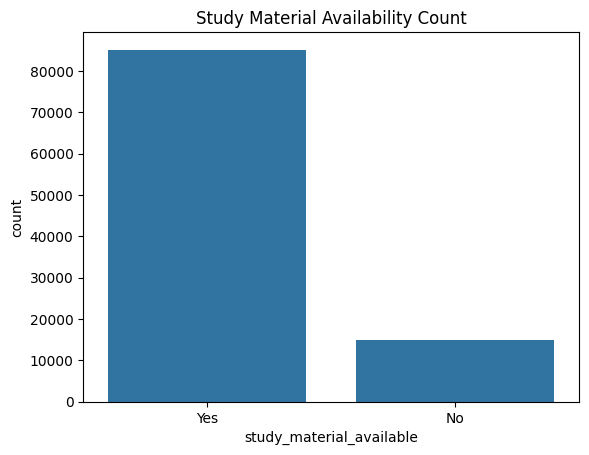

In [ ]:
# 4. Study Material Available
sns.countplot(x= 'study_material_available', data= df)
plt.title('Study Material Availability Count')
plt.show()

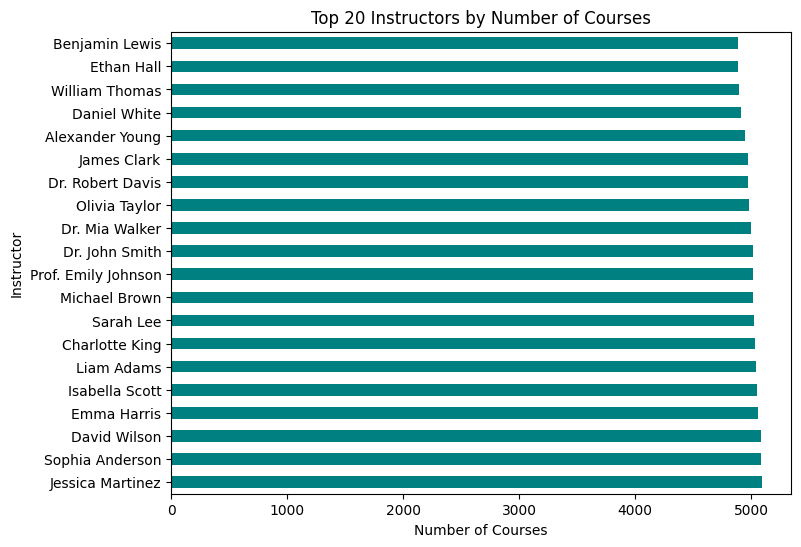

In [ ]:
# 5. Top 20 Instructors by Number Of Courses
df['instructor'].value_counts().head(20).plot(kind= 'barh', figsize= (8,6), color= 'teal')
plt.title('Top 20 Instructors by Number of Courses')
plt.xlabel('Number of Courses')
plt.ylabel('Instructor')
plt.show()

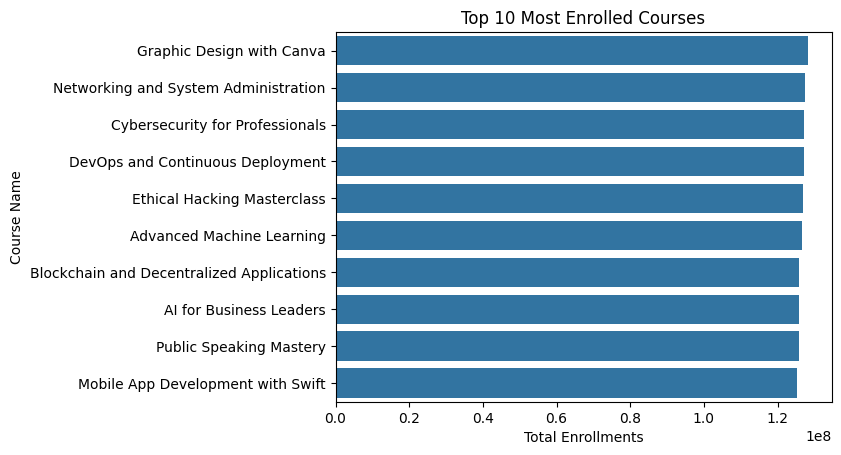

In [ ]:
# 6. Top 10 Most Enrolled Courses
top_courses= (df.groupby('course_name')['enrollment_numbers'].sum().sort_values(ascending= False).head(10).reset_index())
sns.barplot(x= 'enrollment_numbers', y= 'course_name', data= top_courses)
plt.title('Top 10 Most Enrolled Courses')
plt.xlabel('Total Enrollments')
plt.ylabel('Course Name')
plt.show()

In [ ]:
!pip install wordcloud

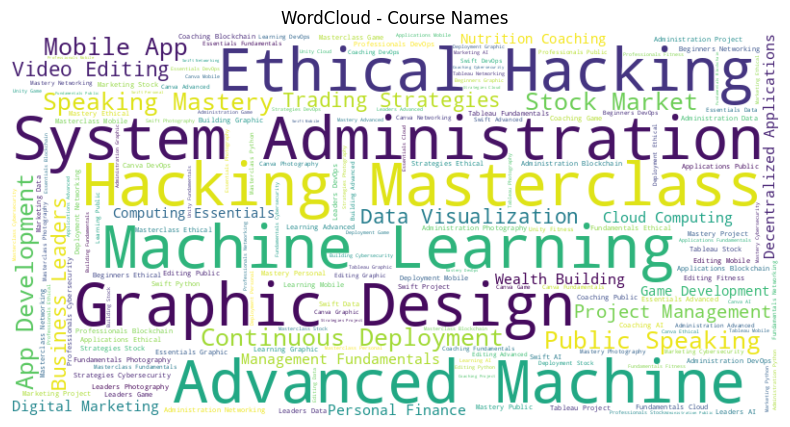

In [ ]:
# 7. Word Cloud for Course Names
from wordcloud import WordCloud

text= ' '.join(df['course_name'].astype(str))
wordcloud= WordCloud(width= 800, height= 400, background_color= 'white').generate(text)
plt.figure(figsize= (10, 5))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.title('WordCloud - Course Names')
plt.show()

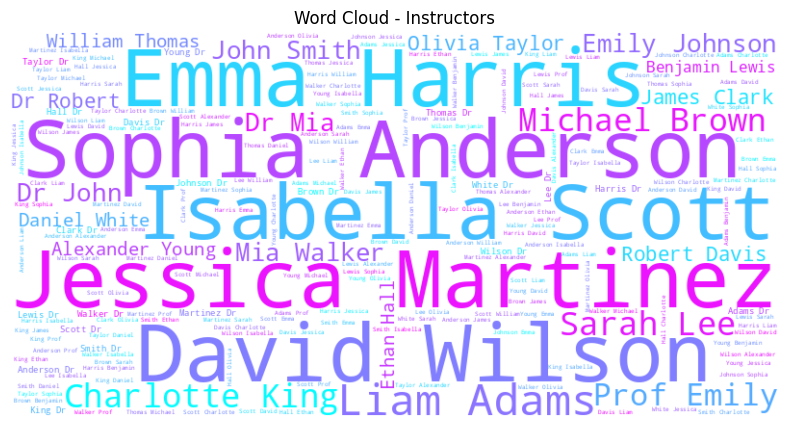

In [ ]:
# 7. Word Cloud for Course Names
from wordcloud import WordCloud

text = ' '.join(df['instructor'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'cool').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Instructors')
plt.show()

In [ ]:
# 9. Frequency Tables & Cross-tabs
freq_table= df['difficulty_level'].value_counts()
print(freq_table)

cross_tab= pd.crosstab(df['difficulty_level'], df['certification_offered'])
print(cross_tab)

difficulty_level
Beginner        49877
Intermediate    29899
Advanced        20224
Name: count, dtype: int64
certification_offered     No    Yes
difficulty_level                   
Advanced                6075  14149
Beginner               14919  34958
Intermediate            8947  20952


/tmp/ipython-input-1647694711.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x= 'difficulty_level', y= 'rating', hue= 'instructor', data= df, ci=None)


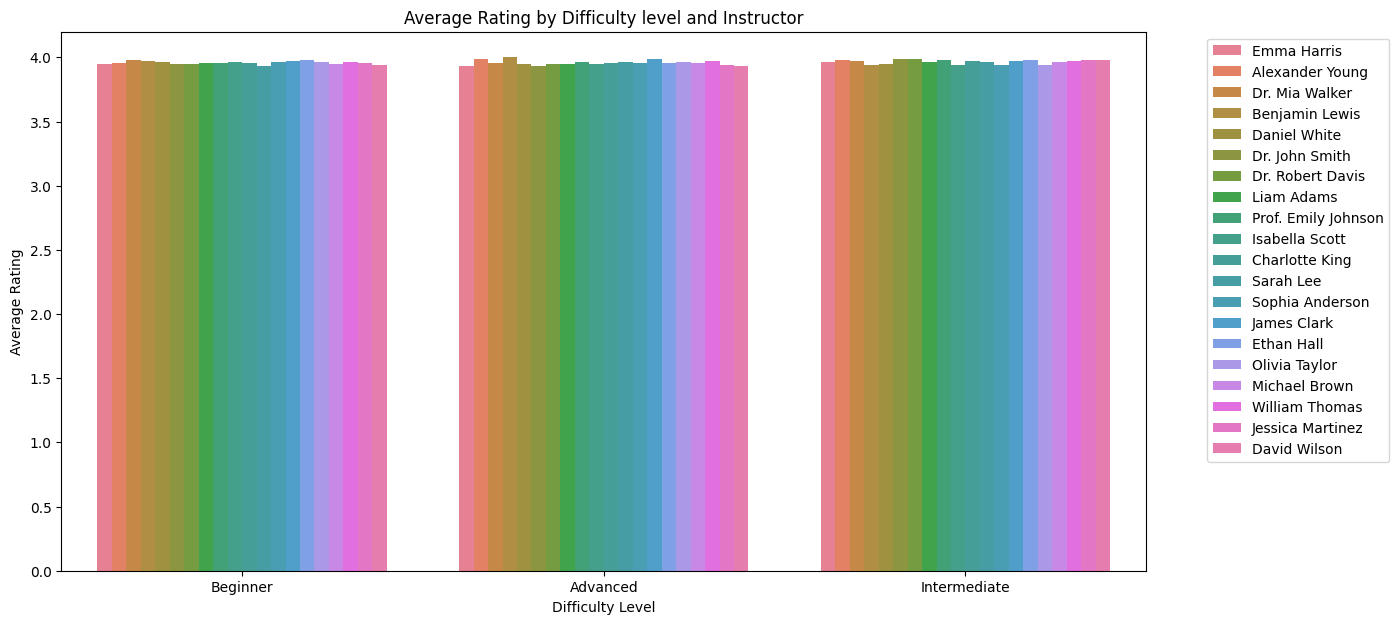

In [ ]:
# 10. Average Rating by Difficulty level and Instructor
plt.figure(figsize= (14, 7))
sns.barplot(x= 'difficulty_level', y= 'rating', hue= 'instructor', data= df, ci=None)
plt.title('Average Rating by Difficulty level and Instructor')
plt.ylabel('Average Rating')
plt.xlabel('Difficulty Level')
plt.legend(bbox_to_anchor= (1.05, 1), loc= 'upper left')
plt.show()

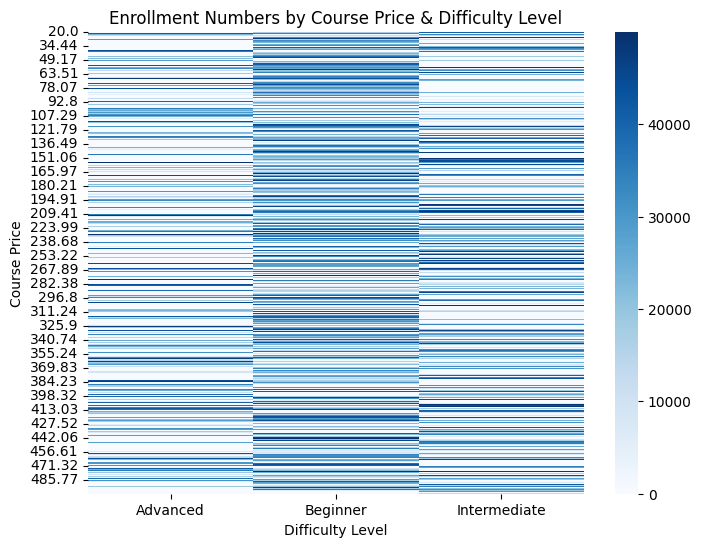

In [ ]:
# 11. Enrollment Numbers by Course Price & Difficulty Level
plt.figure(figsize= (8,6))
df_pivot= df.pivot_table(values= 'enrollment_numbers', index= 'course_price', columns= 'difficulty_level', aggfunc= 'mean').fillna(0)
sns.heatmap(df_pivot, cmap= 'Blues')
plt.title('Enrollment Numbers by Course Price & Difficulty Level')
plt.xlabel('Difficulty Level')
plt.ylabel('Course Price')
plt.show()

## Data Preprocessing

In [ ]:
# # ============================================================
# # 📦 FILE: preprocessing_pipeline.py
# # ============================================================
# # PURPOSE:
# #   1️⃣ Converts raw input data into a clean, model-ready DataFrame.
# #   2️⃣ Encodes categorical columns.
# #   3️⃣ Scales numerical columns using MinMaxScaler.
# #   4️⃣ Saves LabelEncoders and Scaler for consistent transformation.
# # ============================================================

# from sklearn.preprocessing import LabelEncoder, MinMaxScaler
# import joblib
# import os


# def prepare_course_data(df: pd.DataFrame, save_dir: str = "artifacts") -> pd.DataFrame:
#     """
#     Cleans and transforms raw course dataset into model-ready form.

#     Steps:
#     1. Encode Yes/No binary columns.
#     2. Drop unnecessary columns.
#     3. Label encode categorical features.
#     4. Apply MinMaxScaler to numerical columns.
#     5. Save encoders and scaler (for later inference).
#     6. Return a clean, processed DataFrame.

#     Parameters
#     ----------
#     df : pd.DataFrame
#         Raw input dataset.
#     save_dir : str, optional
#         Directory where encoders/scalers are saved (default is 'artifacts').

#     Returns
#     -------
#     pd.DataFrame
#         Cleaned and preprocessed dataset ready for model input.
#     """

#     # ------------------------------------------------------------
#     # 🧹 Step 1: Encode Yes/No Columns to Binary
#     # ------------------------------------------------------------
#     if 'certification_offered' in df.columns:
#         df['certification_offered'] = df['certification_offered'].replace({'Yes': 1, 'No': 0})
#     if 'study_material_available' in df.columns:
#         df['study_material_available'] = df['study_material_available'].replace({'Yes': 1, 'No': 0})

#     # ------------------------------------------------------------
#     # 🗑️ Step 2: Drop Unnecessary Columns
#     # ------------------------------------------------------------
#     if 'course_id' in df.columns:
#         df = df.drop(['course_id'], axis=1)

#     # ------------------------------------------------------------
#     # ✨ Step 3: Label Encode Categorical Columns
#     # ------------------------------------------------------------
#     le_course = LabelEncoder()
#     le_instructor = LabelEncoder()
#     le_difficulty = LabelEncoder()

#     df['course_name_enc'] = le_course.fit_transform(df['course_name'])
#     df['instructor_enc'] = le_instructor.fit_transform(df['instructor'])
#     df['difficulty_level_enc'] = le_difficulty.fit_transform(df['difficulty_level'])

#     # ------------------------------------------------------------
#     # 🔢 Step 4: Apply MinMax Scaling to Numeric Columns
#     # ------------------------------------------------------------
#     numeric_cols = [
#         'enrollment_numbers',
#         'course_price',
#         'course_duration_hours',
#         'feedback_score',
#         'time_spent_hours',
#         'rating',
#         'course_taken'
#     ]

#     scaler = MinMaxScaler()
#     df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#     # ------------------------------------------------------------
#     # 💾 Step 5: Save All Encoders & Scaler for Deployment
#     # ------------------------------------------------------------
#     os.makedirs(save_dir, exist_ok=True)
#     joblib.dump(le_course, f"{save_dir}/le_course.pkl")
#     joblib.dump(le_instructor, f"{save_dir}/le_instructor.pkl")
#     joblib.dump(le_difficulty, f"{save_dir}/le_difficulty.pkl")
#     joblib.dump(scaler, f"{save_dir}/minmax_scaler.pkl")

#     # ------------------------------------------------------------
#     # 🎯 Step 6: Keep Only Model-Relevant Columns
#     # ------------------------------------------------------------
#     scaled_df = df[[
#         'user_id',
#         'course_name_enc',
#         'instructor_enc',
#         'difficulty_level_enc'
#     ] + numeric_cols]

#     print(f"✅ Data preprocessing complete. Artifacts saved to: '{save_dir}'")
#     return scaled_df

In [ ]:
# from preprocessing_pipeline import prepare_course_data

# # Apply preprocessing
# scaled_df = prepare_course_data(df)
# print(scaled_df.head())

In [ ]:
# =========================================================
# 📦 FUNCTION: prepare_course_data()
# =========================================================
# Cleans, encodes, and scales course data for recommendation models.
# - Converts Yes/No columns to binary
# - Label-encodes categorical features
# - Applies MinMaxScaler to numeric features
# - Returns a clean, model-ready dataframe
# =========================================================

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

def prepare_course_data(df: pd.DataFrame):
    """
    Prepare the dataset for CF, CBF, or Hybrid recommendation models.

    Steps:
    1. Encode binary Yes/No columns.
    2. Drop unnecessary identifiers.
    3. Label encode categorical text columns.
    4. Apply MinMax scaling to numeric columns.
    5. Return a clean, ready-to-train DataFrame.
    """

    # 1. Encode binary Yes/No
    if 'certification_offered' in df.columns:
        df['certification_offered'] = df['certification_offered'].replace({'Yes': 1, 'No': 0})
    if 'study_material_available' in df.columns:
        df['study_material_available'] = df['study_material_available'].replace({'Yes': 1, 'No': 0})

    # 2. Drop unnecessary columns
    if 'course_id' in df.columns:
        df = df.drop(['course_id'], axis=1)

    # 3. Label Encoding
    le_course = LabelEncoder()
    le_instructor = LabelEncoder()
    le_difficulty = LabelEncoder()

    df['course_name_enc'] = le_course.fit_transform(df['course_name'])
    df['instructor_enc'] = le_instructor.fit_transform(df['instructor'])
    df['difficulty_level_enc'] = le_difficulty.fit_transform(df['difficulty_level'])

    # 4. Scale numerical features
    numeric_cols = [
        'enrollment_numbers',
        'course_price',
        'course_duration_hours',
        'feedback_score',
        'time_spent_hours',
        'rating',
        'course_taken'
    ]

    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    # 5. Final cleaned DataFrame
    scaled_df = df[[
        'user_id',
        'course_name_enc',
        'course_name',
        'instructor_enc',
        'instructor',
        'difficulty_level_enc',
        'difficulty_level'
    ] + numeric_cols]

    # ✅ Return both the DataFrame and the preprocessing objects
    return scaled_df, le_course, le_instructor, le_difficulty, scaler

In [ ]:
scaled_df, le_course, le_instructor, le_difficulty, scaler = prepare_course_data(df)

In [ ]:
# Quick preview
scaled_df.head()

,user_id,course_name_enc,course_name,instructor_enc,instructor,difficulty_level_enc,difficulty_level,enrollment_numbers,course_price,course_duration_hours,feedback_score,time_spent_hours,rating,course_taken
0,15796,18,Python for Beginners,8,Emma Harris,1,Beginner,0.431440,0.619792,0.358947,0.776432,0.199639,1.000,0.1
1,861,4,Cybersecurity for Professionals,0,Alexander Young,1,Beginner,0.306893,0.043729,0.329474,0.746696,0.336380,0.825,0.3
2,38159,6,DevOps and Continuous Deployment,6,Dr. Mia Walker,1,Beginner,0.127750,0.751688,0.088421,0.748899,0.618641,0.725,0.1
3,44733,16,Project Management Fundamentals,1,Benjamin Lewis,1,Beginner,0.964884,0.672500,0.561053,0.965859,0.256043,0.525,0.3
4,11285,7,Ethical Hacking Masterclass,3,Daniel White,1,Beginner,0.690825,0.752104,0.271579,0.509912,0.252676,0.450,0.3


In [ ]:
scaled_df[['course_name_enc', 'course_name']].drop_duplicates().sort_values('course_name_enc').reset_index(drop=True)

,course_name_enc,course_name
0,0,AI for Business Leaders
1,1,Advanced Machine Learning
2,2,Blockchain and Decentralized Applications
3,3,Cloud Computing Essentials
4,4,Cybersecurity for Professionals
5,5,Data Visualization with Tableau
6,6,DevOps and Continuous Deployment
7,7,Ethical Hacking Masterclass
8,8,Fitness and Nutrition Coaching
9,9,Fundamentals of Digital Marketing


In [ ]:
scaled_df[['instructor_enc', 'instructor']].drop_duplicates().sort_values('instructor_enc').reset_index(drop=True)

,instructor_enc,instructor
0,0,Alexander Young
1,1,Benjamin Lewis
2,2,Charlotte King
3,3,Daniel White
4,4,David Wilson
5,5,Dr. John Smith
6,6,Dr. Mia Walker
7,7,Dr. Robert Davis
8,8,Emma Harris
9,9,Ethan Hall


In [ ]:
scaled_df[['difficulty_level_enc', 'difficulty_level']].drop_duplicates().sort_values('difficulty_level_enc').reset_index(drop=True)

,difficulty_level_enc,difficulty_level
0,0,Advanced
1,1,Beginner
2,2,Intermediate


### PCA & Feature Importance


Explained variance ratio per component:
PC1: 0.4961 (49.61% cumulative)
PC2: 0.4913 (98.74% cumulative)
PC3: 0.0073 (99.47% cumulative)
PC4: 0.0012 (99.60% cumulative)
PC5: 0.0012 (99.72% cumulative)
PC6: 0.0012 (99.84% cumulative)
PC7: 0.0005 (99.89% cumulative)
PC8: 0.0004 (99.93% cumulative)
PC9: 0.0004 (99.97% cumulative)
PC10: 0.0003 (100.00% cumulative)


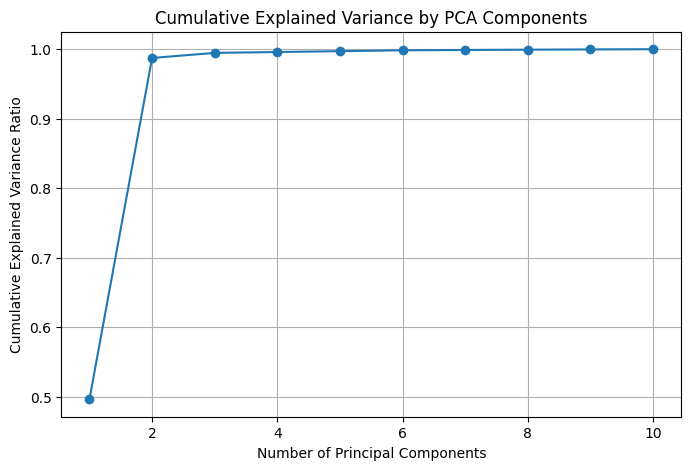

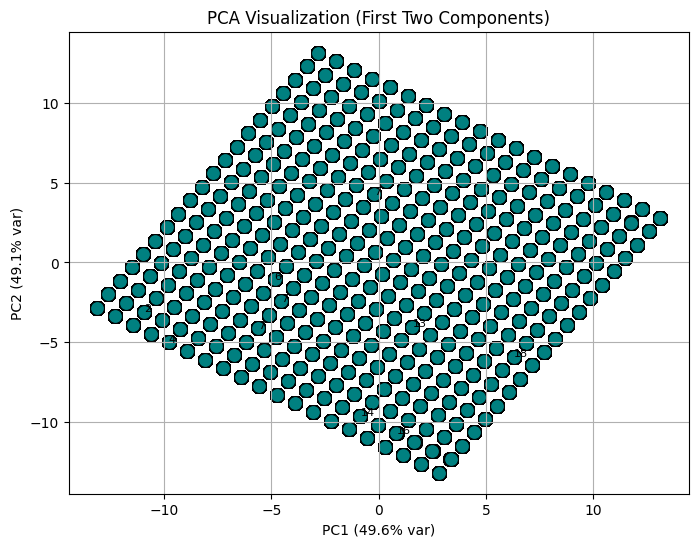


Top feature contributions to the first few PCs:
                            PC1       PC2       PC3
course_name_enc        0.839457 -0.543425 -0.000360
instructor_enc         0.543425  0.839457 -0.000262
difficulty_level_enc   0.000445  0.000023  0.999991
enrollment_numbers    -0.000126  0.000417  0.003229
course_price          -0.000042 -0.000179 -0.001732
course_duration_hours  0.000244 -0.000075  0.000751
feedback_score        -0.000219 -0.000009  0.001125
time_spent_hours       0.000080  0.000012 -0.000246
rating                -0.000081 -0.000030  0.001381
course_taken           0.000063 -0.000003  0.000424


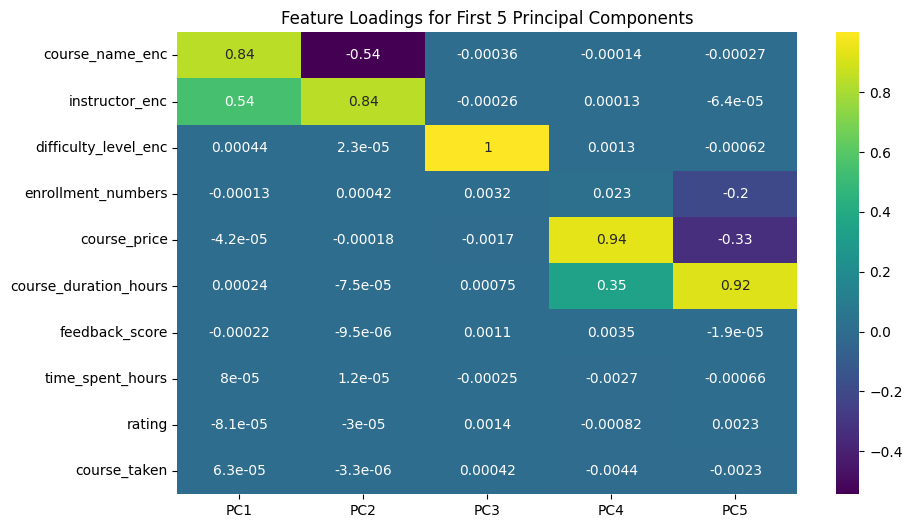

In [ ]:
from sklearn.decomposition import PCA

# --- Step 1: Define features for PCA ---
# We'll use encoded categorical and scaled numeric columns (no raw strings)
feature_cols = [
    'course_name_enc',
    'instructor_enc',
    'difficulty_level_enc',
    'enrollment_numbers',
    'course_price',
    'course_duration_hours',
    'feedback_score',
    'time_spent_hours',
    'rating',
    'course_taken'
]

X = scaled_df[feature_cols]

# --- Step 2: Apply PCA ---
pca = PCA(n_components=None, random_state=42)  # get all components to analyze variance
X_pca = pca.fit_transform(X)

# --- Step 3: Create a DataFrame of principal components ---
pca_df = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(X_pca.shape[1])]
)

# Add course name (optional for labeling)
if 'course_name_enc' in scaled_df.columns:
    pca_df['course_name'] = scaled_df['course_name_enc']

# --- Step 4: Explained Variance Analysis ---
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var_ratio)

print("Explained variance ratio per component:")
for i, var in enumerate(explained_var_ratio):
    print(f"PC{i+1}: {var:.4f} ({cumulative_var[i]*100:.2f}% cumulative)")

# --- Step 5: Plot variance explained ---
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_var, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# --- Step 6: 2D Visualization using first 2 principal components ---
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=pca_df['PC1'],
    y=pca_df['PC2'],
    s=100,
    color='teal',
    edgecolor='black'
)

# Optional: label some points
for i, txt in enumerate(pca_df['course_name'][:10]):
    plt.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8)

plt.title('PCA Visualization (First Two Components)')
plt.xlabel(f"PC1 ({explained_var_ratio[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_var_ratio[1]*100:.1f}% var)")
plt.grid(True)
plt.show()

# --- Step 7: Feature importance (PCA loadings) ---
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(X.shape[1])],
    index=feature_cols
)

print("\nTop feature contributions to the first few PCs:")
print(loadings.iloc[:, :3])  # top 3 components

# Optional: visualize feature importance heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings.iloc[:, :5], annot=True, cmap='viridis')
plt.title('Feature Loadings for First 5 Principal Components')
plt.show()

In [ ]:
!pip install implicit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Model Building
### 1. COLLABORATIVE FILTERING (ALS)

In [ ]:
from tqdm import tqdm
from scipy.sparse import csr_matrix
import implicit
from sklearn.model_selection import train_test_split

df_cf = scaled_df.copy()

# ---- Step 1: Rebuild interaction (scaled positive values) ----
df_cf['interaction'] = (
    0.7 * (df_cf['feedback_score'] - df_cf['feedback_score'].min()) /
          (df_cf['feedback_score'].max() - df_cf['feedback_score'].min() + 1e-6)
    +
    0.3 * (df_cf['time_spent_hours'] - df_cf['time_spent_hours'].min()) /
          (df_cf['time_spent_hours'].max() - df_cf['time_spent_hours'].min() + 1e-6)
)

# ---- Step 2: User–item mapping ----
user_map = {u: i for i, u in enumerate(df_cf['user_id'].unique())}
item_map = {c: i for i, c in enumerate(df_cf['course_name_enc'].unique())}
user_inv = {i: u for u, i in user_map.items()}
item_inv = {i: c for c, i in item_map.items()}

rows = df_cf['user_id'].map(user_map)
cols = df_cf['course_name_enc'].map(item_map)
vals = df_cf['interaction']
interaction_matrix = csr_matrix((vals, (rows, cols)),
                                shape=(len(user_map), len(item_map)))

# ---- Step 3: Train/test split ----
train_df, test_df = train_test_split(df_cf, test_size=0.2, random_state=42)
train_rows = train_df['user_id'].map(user_map)
train_cols = train_df['course_name_enc'].map(item_map)
train_vals = train_df['interaction']
test_rows = test_df['user_id'].map(user_map)
test_cols = test_df['course_name_enc'].map(item_map)
test_vals = test_df['interaction']

train_matrix = csr_matrix((train_vals, (train_rows, train_cols)),
                          shape=(len(user_map), len(item_map)))
test_matrix = csr_matrix((test_vals, (test_rows, test_cols)),
                         shape=(len(user_map), len(item_map)))

# ---- Step 4: Helper functions ----
def recommend_cf(model, user_id, n=10):
    if user_id not in user_map:
        return "User not found."
    uid = user_map[user_id]
    recs = model.recommend(uid, train_matrix[uid], N=n)
    if isinstance(recs, tuple):
        item_ids, scores = recs
    else:
        item_ids, scores = zip(*recs)
    course_ids = [item_inv[i] for i in item_ids]

    # 🔍 Map encoded course IDs back to actual names
    course_lookup = df_cf[['course_name_enc', 'course_name']].drop_duplicates()
    recs_df = pd.DataFrame({'course_name_enc': course_ids, 'score': scores})
    recs_df = recs_df.merge(course_lookup, on='course_name_enc', how='left')

    # Arrange columns nicely
    recs_df = recs_df[['course_name_enc', 'course_name', 'score']]
    return recs_df

def precision_at_k(model, user_id, k=10):
    true_items = set(test_df[test_df['user_id'] == user_id]['course_name_enc'])
    if not true_items:
        return np.nan
    recs = recommend_cf(model, user_id, n=k)
    recommended_items = set(recs['course_name_enc'])
    return len(true_items.intersection(recommended_items)) / k

def recall_at_k(model, user_id, k=10):
    true_items = set(test_df[test_df['user_id'] == user_id]['course_name_enc'])
    if not true_items:
        return np.nan
    recs = recommend_cf(model, user_id, n=k)
    recommended_items = set(recs['course_name_enc'])
    return len(true_items.intersection(recommended_items)) / len(true_items)


# ---- Step 5: Light hyperparameter tuning ----
param_grid = [
    {'factors': 64, 'regularization': 0.05, 'iterations': 25},
    {'factors': 96, 'regularization': 0.05, 'iterations': 25},
    {'factors': 128, 'regularization': 0.08, 'iterations': 30},
]

results = []
sample_users = np.random.choice(df_cf['user_id'].unique(), size=30, replace=False)

for params in param_grid:
    print(f"\n🚀 Training ALS: factors={params['factors']}, reg={params['regularization']}, iters={params['iterations']}")
    model = implicit.als.AlternatingLeastSquares(
        factors=params['factors'],
        regularization=params['regularization'],
        iterations=params['iterations'],
        random_state=42
    )
    model.fit(train_matrix)

    precisions, recalls = [], []
    for uid in tqdm(sample_users, desc="Evaluating"):
        p = precision_at_k(model, uid, k=10)
        r = recall_at_k(model, uid, k=10)
        if not np.isnan(p): precisions.append(p)
        if not np.isnan(r): recalls.append(r)

    mean_p, mean_r = np.mean(precisions), np.mean(recalls)
    f1 = 2 * (mean_p * mean_r) / (mean_p + mean_r + 1e-6)
    results.append({**params, 'precision': mean_p, 'recall': mean_r, 'f1': f1})

# ---- Step 6: Show results ----
results_df = pd.DataFrame(results).sort_values('f1', ascending=False)
print("\n🏆 Best parameters found:")
print(results_df.head(3))

best_params = results_df.iloc[0]

# ---- Step 7: Final model ----
model_cf_final = implicit.als.AlternatingLeastSquares(
    factors=int(best_params['factors']),
    regularization=float(best_params['regularization']),
    iterations=int(best_params['iterations']),
    random_state=42
)
model_cf_final.fit(train_matrix)

# ---- Step 8: Evaluate final model ----
sample_users_final = np.random.choice(df_cf['user_id'].unique(), size=40, replace=False)
precisions, recalls = [], []
for uid in tqdm(sample_users_final, desc="Final Evaluation"):
    p = precision_at_k(model_cf_final, uid, k=10)
    r = recall_at_k(model_cf_final, uid, k=10)
    if not np.isnan(p): precisions.append(p)
    if not np.isnan(r): recalls.append(r)

print(f"\n✅ Final ALS Model:")
print(f"Precision@10: {np.mean(precisions):.4f}")
print(f"Recall@10:    {np.mean(recalls):.4f}")

# ---- Step 9: Example Recommendations ----
example_user = df_cf['user_id'].iloc[0]
recs = recommend_cf(model_cf_final, example_user, n=10)
print(f"\n🎯 Top 10 Recommendations for User {example_user}:\n")
print(recs)


🚀 Training ALS: factors=64, reg=0.05, iters=25


  0%|          | 0/25 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 30/30 [00:00<00:00, 53.83it/s]


🚀 Training ALS: factors=96, reg=0.05, iters=25


  0%|          | 0/25 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 30/30 [00:00<00:00, 54.75it/s]


🚀 Training ALS: factors=128, reg=0.08, iters=30


  0%|          | 0/30 [00:00<?, ?it/s]

Evaluating: 100%|██████████| 30/30 [00:01<00:00, 25.13it/s]


🏆 Best parameters found:
   factors  regularization  iterations  precision    recall        f1
1       96            0.05          25   0.083333  0.625000  0.147059
0       64            0.05          25   0.075000  0.583333  0.132911
2      128            0.08          30   0.058333  0.458333  0.103494


  0%|          | 0/25 [00:00<?, ?it/s]

Final Evaluation: 100%|██████████| 40/40 [00:01<00:00, 36.72it/s]


✅ Final ALS Model:
Precision@10: 0.0500
Recall@10:    0.4286

🎯 Top 10 Recommendations for User 15796:

   course_name_enc                                course_name         score
0               10                Game Development with Unity  7.855333e-05
1                0                    AI for Business Leaders  7.749442e-05
2               13       Networking and System Administration  6.910414e-05
3               14       Personal Finance and Wealth Building  6.069569e-05
4                7                Ethical Hacking Masterclass  5.330518e-05
5               17                    Public Speaking Mastery  1.410395e-05
6                3                 Cloud Computing Essentials  1.408160e-05
7               11                  Graphic Design with Canva  1.810491e-06
8               19        Stock Market and Trading Strategies  5.085021e-07
9                2  Blockchain and Decentralized Applications -5.200505e-06


✅ User factors shape: (43242, 64)
✅ Item factors shape: (20, 64)


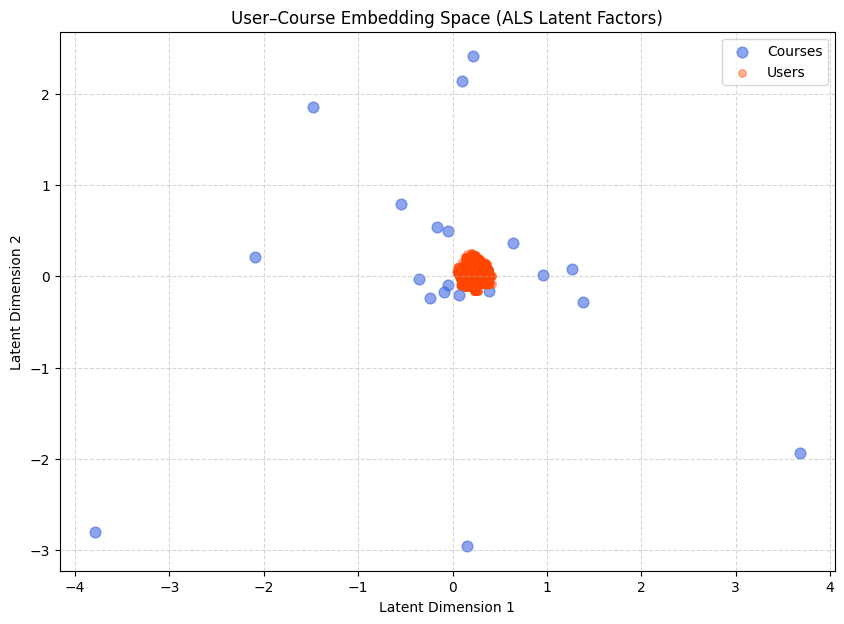


🎯 Courses closest to user 15796 in latent space:

   course_name_enc  similarity
0                6    1.001361
1               18    0.998596
2               19    0.000561
3               15    0.000389
4                8    0.000281


In [ ]:
# VISUALIZING ALS EMBEDDINGS (FIXED FOR GPU)

# Convert implicit GPU matrices to CPU NumPy arrays if necessary
def to_numpy(matrix):
    """Converts implicit.gpu._cuda.Matrix or numpy array to numpy.ndarray"""
    try:
        return np.array(matrix.to_numpy())
    except AttributeError:
        return np.array(matrix)

# Extract latent factors safely
user_factors = to_numpy(model_cf.user_factors)
item_factors = to_numpy(model_cf.item_factors)

print(f"✅ User factors shape: {user_factors.shape}")
print(f"✅ Item factors shape: {item_factors.shape}")

# Dimensionality reduction for visualization
pca = PCA(n_components=2, random_state=42)
item_pca = pca.fit_transform(item_factors)
user_pca = pca.transform(user_factors)

# Prepare data for plotting
item_df = pd.DataFrame(item_pca, columns=['x', 'y'])
item_df['type'] = 'course'
item_df['course_name_enc'] = list(item_inv.values())

user_df = pd.DataFrame(user_pca, columns=['x', 'y'])
user_df['type'] = 'user'
user_df['user_id'] = list(user_inv.values())

# Plot user–course latent embeddings
plt.figure(figsize=(10, 7))
plt.scatter(item_df['x'], item_df['y'], s=60, c='royalblue', alpha=0.6, label='Courses')
plt.scatter(user_df['x'], user_df['y'], s=30, c='orangered', alpha=0.4, label='Users')
plt.title('User–Course Embedding Space (ALS Latent Factors)')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Helper: find closest courses to a given user
def show_user_neighbors(user_id, top_k=5):
    """Show the nearest courses in latent space to a given user."""
    if user_id not in user_map:
        return "User not found."

    uid = user_map[user_id]
    user_vec = user_factors[uid].reshape(1, -1)
    sims = np.dot(item_factors, user_vec.T).flatten()
    top_idx = np.argsort(-sims)[:top_k]
    top_courses = [item_inv[i] for i in top_idx]

    return pd.DataFrame({
        'course_name_enc': top_courses,
        'similarity': sims[top_idx]
    })

# Example usage:
neighbors = show_user_neighbors(15796, top_k=5)
print("\n🎯 Courses closest to user 15796 in latent space:\n")
print(neighbors)

### 2. CONTENT-BASED FILTERING (CBF)

In [ ]:
# CONTENT-BASED FILTERING (CBF)
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ndcg_score
from tqdm import tqdm

# --- Step 1️⃣: Prepare feature matrix ---
course_features = scaled_df[[
    'course_name_enc', 'instructor_enc', 'difficulty_level_enc',
    'enrollment_numbers', 'course_price', 'course_duration_hours',
    'feedback_score', 'time_spent_hours'
]].drop_duplicates(subset=['course_name_enc']).reset_index(drop=True)

# Extract feature matrix (everything except course_name_enc)
feature_matrix = course_features.drop(columns=['course_name_enc']).values

# 2️⃣ Function: Generate recommendations
def recommend_cbf(input_features, n=10, feature_weights=None):
    """
    Recommends top-N courses similar to user’s input profile.

    Parameters:
    -----------
    input_features : dict
        Feature values of the user's interests.
    n : int
        Number of recommendations.
    feature_weights : list or np.ndarray
        Optional weights to emphasize certain features.

    Returns:
    --------
    pd.DataFrame with top-N recommended courses and similarity scores.
    """

    # Convert input features to array
    user_vector = np.array([[
        input_features['instructor_enc'],
        input_features['difficulty_level_enc'],
        input_features['enrollment_numbers'],
        input_features['course_price'],
        input_features['course_duration_hours'],
        input_features['feedback_score'],
        input_features['time_spent_hours']
    ]])

    # Apply feature weights (if any)
    if feature_weights is not None:
        user_vector = user_vector * feature_weights
        weighted_features = feature_matrix * feature_weights
    else:
        weighted_features = feature_matrix

    # Compute cosine similarity
    sims = cosine_similarity(user_vector, weighted_features)[0]

    # Get top-N similar courses
    top_indices = sims.argsort()[-n:][::-1]
    results = course_features.iloc[top_indices][['course_name_enc']].copy()
    results['similarity_score'] = sims[top_indices]

    # 🧠 Add original course names
    course_lookup = scaled_df[['course_name_enc', 'course_name']].drop_duplicates()
    results = results.merge(course_lookup, on='course_name_enc', how='left')

    # Arrange columns nicely
    results = results[['course_name_enc', 'course_name', 'similarity_score']]

    return results.reset_index(drop=True)

# 3️⃣ Evaluation Metrics for CBF
def evaluate_cbf(user_id, k=10, feature_weights=None):
    """
    Evaluates CBF recommendations for a user by comparing recommended
    courses with courses actually taken or rated highly by the user.
    """

    # Get user’s profile (average of features of courses they liked/took)
    user_courses = scaled_df[scaled_df['user_id'] == user_id]
    if user_courses.empty:
        return np.nan, np.nan, np.nan

    # Construct average profile
    input_features = {
        'instructor_enc': user_courses['instructor_enc'].mean(),
        'difficulty_level_enc': user_courses['difficulty_level_enc'].mean(),
        'enrollment_numbers': user_courses['enrollment_numbers'].mean(),
        'course_price': user_courses['course_price'].mean(),
        'course_duration_hours': user_courses['course_duration_hours'].mean(),
        'feedback_score': user_courses['feedback_score'].mean(),
        'time_spent_hours': user_courses['time_spent_hours'].mean(),
    }

    # Get top-N recommendations
    recs = recommend_cbf(input_features, n=k, feature_weights=feature_weights)
    recommended_courses = set(recs['course_name_enc'])

    # True relevant courses (based on what user actually took)
    true_courses = set(user_courses['course_name_enc'])

    if not true_courses:
        return np.nan, np.nan, np.nan

    # Compute metrics
    hits = len(true_courses.intersection(recommended_courses))
    precision = hits / k
    recall = hits / len(true_courses)

    # For NDCG@K (ranking quality)
    y_true = np.isin(course_features['course_name_enc'], list(true_courses)).astype(int)
    y_score = np.zeros_like(y_true, dtype=float)
    for idx, cname in enumerate(course_features['course_name_enc']):
        if cname in recs['course_name_enc'].values:
            y_score[idx] = recs.loc[recs['course_name_enc'] == cname, 'similarity_score'].values[0]
    ndcg = ndcg_score([y_true], [y_score])

    return precision, recall, ndcg

# 4️⃣ Lightweight Hyperparameter Tuning (Feature Weighting)
param_grid = [
    [1, 1, 1, 1, 1, 1, 1],          # baseline (equal weights)
    [1, 1, 1, 0.8, 1.2, 1.2, 1.5],  # emphasize time & feedback
    [1, 1, 1, 1.2, 0.8, 1.5, 1.5],  # emphasize feedback & time_spent
    [1, 1, 1, 1.5, 1, 1.5, 1.5],    # more on engagement features
]

sample_users = np.random.choice(scaled_df['user_id'].unique(), size=30, replace=False)
results = []

for weights in param_grid:
    precisions, recalls, ndcgs = [], [], []
    for uid in tqdm(sample_users, desc=f"Testing weights={weights}"):
        p, r, n = evaluate_cbf(uid, k=10, feature_weights=weights)
        if not np.isnan(p): precisions.append(p)
        if not np.isnan(r): recalls.append(r)
        if not np.isnan(n): ndcgs.append(n)

    results.append({
        'weights': weights,
        'precision': np.mean(precisions),
        'recall': np.mean(recalls),
        'ndcg': np.mean(ndcgs)
    })

results_df = pd.DataFrame(results).sort_values('precision', ascending=False)
print("\n🏆 Best feature weight combination found:")
print(results_df.head(3))

best_weights = results_df.iloc[0]['weights']

# 5️⃣ Final Evaluation with Optimal Weights
sample_users_final = np.random.choice(scaled_df['user_id'].unique(), size=50, replace=False)
precisions, recalls, ndcgs = [], [], []

for uid in tqdm(sample_users_final, desc="Final CBF Evaluation"):
    p, r, n = evaluate_cbf(uid, k=10, feature_weights=best_weights)
    if not np.isnan(p): precisions.append(p)
    if not np.isnan(r): recalls.append(r)
    if not np.isnan(n): ndcgs.append(n)

print("\n✅ Final CBF Model Evaluation Results:")
print(f"Precision@10: {np.mean(precisions):.4f}")
print(f"Recall@10:    {np.mean(recalls):.4f}")
print(f"NDCG@10:      {np.mean(ndcgs):.4f}")

# 6️⃣ Example: Personalized Recommendation
example_user = scaled_df['user_id'].iloc[0]
user_profile = scaled_df[scaled_df['user_id'] == example_user].iloc[0]

input_features = {
    'instructor_enc': user_profile['instructor_enc'],
    'difficulty_level_enc': user_profile['difficulty_level_enc'],
    'enrollment_numbers': user_profile['enrollment_numbers'],
    'course_price': user_profile['course_price'],
    'course_duration_hours': user_profile['course_duration_hours'],
    'feedback_score': user_profile['feedback_score'],
    'time_spent_hours': user_profile['time_spent_hours']
}

recommendations = recommend_cbf(input_features, n=10, feature_weights=best_weights)
print(f"\n🎯 Top 10 CBF Recommendations for User {example_user}:\n")
print(recommendations)


Testing weights=[1, 1, 1, 1.5, 1, 1.5, 1.5]: 100%|██████████| 30/30 [00:00<00:00, 56.06it/s]



🏆 Best feature weight combination found:
                         weights  precision    recall      ndcg
0          [1, 1, 1, 1, 1, 1, 1]   0.103333  0.494444  0.434229
2  [1, 1, 1, 1.2, 0.8, 1.5, 1.5]   0.103333  0.494444  0.430251
3    [1, 1, 1, 1.5, 1, 1.5, 1.5]   0.103333  0.494444  0.445638


Final CBF Evaluation: 100%|██████████| 50/50 [00:00<00:00, 55.54it/s]


✅ Final CBF Model Evaluation Results:
Precision@10: 0.1060
Recall@10:    0.4833
NDCG@10:      0.4344

🎯 Top 10 CBF Recommendations for User 15796:

   course_name_enc                           course_name  similarity_score
0               18                  Python for Beginners          1.000000
1               19   Stock Market and Trading Strategies          0.997793
2                8        Fitness and Nutrition Coaching          0.997176
3               13  Networking and System Administration          0.997032
4               12     Mobile App Development with Swift          0.995571
5                3            Cloud Computing Essentials          0.995214
6                5       Data Visualization with Tableau          0.994378
7                6      DevOps and Continuous Deployment          0.994018
8                9     Fundamentals of Digital Marketing          0.990017
9               10           Game Development with Unity          0.984259


### 3. HYBRID RECOMMENDER

In [ ]:
# HYBRID RECOMMENDER WITH AUTOMATIC WEIGHT TUNING + EVALUATION

import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ndcg_score
from tqdm import tqdm

# 1️⃣ Hybrid Recommendation Function
def recommend_hybrid(user_id, input_features, n=10, w_cf=0.6, w_cbf=0.4):
    """
    Hybrid recommender that fuses:
      - Collaborative Filtering (ALS model)
      - Content-Based Filtering (feature similarity)
    Weighted fusion with normalized ranking for stability.

    Args:
        user_id: target user for recommendations
        input_features: user’s course interest profile
        n: number of recommendations to return
        w_cf, w_cbf: weights for CF and CBF components
    """

    # --- Validate user ---
    if user_id not in user_map:
        return "User not found."

    uid = user_map[user_id]

    # --- CF Recommendations ---
    cf_recs = model_cf_final.recommend(uid, interaction_matrix[uid], N=50)

    # Handle implicit version differences
    if isinstance(cf_recs, tuple):  # newer implicit
        item_ids, scores = cf_recs
        cf_courses = [item_inv[i] for i in item_ids]
        cf_scores = np.array(scores)
    else:  # older implicit
        cf_courses = [item_inv[i] for i, _ in cf_recs]
        cf_scores = np.array([s for _, s in cf_recs])

    df_cf_scores = pd.DataFrame({'course_name_enc': cf_courses, 'cf_score': cf_scores})
    df_cf_scores['cf_score_norm'] = df_cf_scores['cf_score'].rank(ascending=False, pct=True)

    # --- CBF Recommendations ---
    user_vector = np.array([[
        input_features['instructor_enc'],
        input_features['difficulty_level_enc'],
        input_features['enrollment_numbers'],
        input_features['course_price'],
        input_features['course_duration_hours'],
        input_features['feedback_score'],
        input_features['time_spent_hours']
    ]])

    sims = cosine_similarity(user_vector, feature_matrix)[0]
    df_cbf_scores = pd.DataFrame({
        'course_name_enc': course_features['course_name_enc'].values,
        'cbf_score': sims
    })
    df_cbf_scores['cbf_score_norm'] = df_cbf_scores['cbf_score'].rank(ascending=False, pct=True)

    # --- Combine CF + CBF ---
    df_hybrid = pd.merge(df_cf_scores, df_cbf_scores, on='course_name_enc', how='outer').fillna(0)
    df_hybrid['hybrid_score'] = (
        w_cf * df_hybrid['cf_score_norm'] + w_cbf * df_hybrid['cbf_score_norm']
    )

    df_hybrid = df_hybrid.drop_duplicates(subset=['course_name_enc'])
    df_hybrid = df_hybrid.sort_values('hybrid_score', ascending=False).reset_index(drop=True)

    # 🧠 Add actual course names
    course_lookup = scaled_df[['course_name_enc', 'course_name']].drop_duplicates()
    df_hybrid = df_hybrid.merge(course_lookup, on='course_name_enc', how='left')

    # ✅ Keep a clean display
    df_hybrid = df_hybrid[['course_name_enc', 'course_name', 'cf_score', 'cbf_score', 'hybrid_score']]

    return df_hybrid.head(n)


# 2️⃣ Evaluation Function for One User
def evaluate_user(user_id, input_features, k=10, w_cf=0.6, w_cbf=0.4):
    """
    Evaluate hybrid recommendations using:
      - Precision@K
      - Recall@K
      - NDCG@K
    """

    recs = recommend_hybrid(user_id, input_features, n=k, w_cf=w_cf, w_cbf=w_cbf)
    if isinstance(recs, str):  # if user not found
        return np.nan, np.nan, np.nan

    recommended = set(recs['course_name_enc'])
    user_data = scaled_df[scaled_df['user_id'] == user_id]
    true_items = set(user_data['course_name_enc'])

    if not true_items:
        return np.nan, np.nan, np.nan

    # --- Compute metrics ---
    hits = len(true_items.intersection(recommended))
    precision = hits / k
    recall = hits / len(true_items)

    # --- NDCG ---
    y_true = np.isin(course_features['course_name_enc'], list(true_items)).astype(int)
    y_score = np.zeros_like(y_true, dtype=float)
    for idx, cname in enumerate(course_features['course_name_enc']):
        if cname in recs['course_name_enc'].values:
            y_score[idx] = recs.loc[recs['course_name_enc'] == cname, 'hybrid_score'].values[0]
    ndcg = ndcg_score([y_true], [y_score]) if np.sum(y_true) > 0 else np.nan

    return precision, recall, ndcg


# 3️⃣ Hyperparameter Tuning (Find Optimal CF–CBF Weights)
def tune_hybrid_weights(user_sample, input_features, w_values=np.linspace(0.1, 0.9, 9)):
    """
    Small grid search to optimize hybrid weight (CF vs CBF) for best Precision@K
    """

    results = []
    for w_cf in tqdm(w_values, desc="Tuning Hybrid Weights"):
        precisions, recalls, ndcgs = [], [], []
        for uid in user_sample:
            p, r, n = evaluate_user(uid, input_features, k=10, w_cf=w_cf, w_cbf=1 - w_cf)
            if not np.isnan(p): precisions.append(p)
            if not np.isnan(r): recalls.append(r)
            if not np.isnan(n): ndcgs.append(n)

        results.append({
            'w_cf': w_cf,
            'w_cbf': 1 - w_cf,
            'precision': np.mean(precisions),
            'recall': np.mean(recalls),
            'ndcg': np.mean(ndcgs)
        })

    results_df = pd.DataFrame(results).sort_values('precision', ascending=False)
    best_row = results_df.iloc[0]
    print("\n🏆 Optimal Hybrid Weights Found:")
    print(best_row)

    return best_row['w_cf'], best_row['w_cbf'], results_df


# 4️⃣ Evaluate & Tune Model
# Example user input (profile or interest vector)
user_input = {
    'instructor_enc': 0,
    'difficulty_level_enc': 1,
    'enrollment_numbers': 0.306893,
    'course_price': 0.043729,
    'course_duration_hours': 0.329474,
    'feedback_score': 0.348930,
    'time_spent_hours': 0.336380
}

# Pick sample users for tuning
sample_users = np.random.choice(scaled_df['user_id'].unique(), size=30, replace=False)

# Tune optimal CF–CBF weights
best_w_cf, best_w_cbf, tuning_results = tune_hybrid_weights(sample_users, user_input)


# 5️⃣ Final Model Evaluation with Optimal Weights
sample_users_final = np.random.choice(scaled_df['user_id'].unique(), size=40, replace=False)
precisions, recalls, ndcgs = [], [], []

for uid in tqdm(sample_users_final, desc="Final Hybrid Evaluation"):
    p, r, n = evaluate_user(uid, user_input, k=10, w_cf=best_w_cf, w_cbf=best_w_cbf)
    if not np.isnan(p): precisions.append(p)
    if not np.isnan(r): recalls.append(r)
    if not np.isnan(n): ndcgs.append(n)

print("\n✅ Final Hybrid Model Performance:")
print(f"Precision@10: {np.mean(precisions):.4f}")
print(f"Recall@10:    {np.mean(recalls):.4f}")
print(f"NDCG@10:      {np.mean(ndcgs):.4f}")

# 6️⃣ Example Recommendation for One User
# Use one of the users from final evaluation
example_user = sample_users_final[0]
recommendations = recommend_hybrid(example_user, user_input, n=10, w_cf=best_w_cf, w_cbf=best_w_cbf)

print(f"\n🎯 Top 10 Optimized Hybrid Recommendations for User {example_user}:\n")
print(recommendations)

Tuning Hybrid Weights: 100%|██████████| 9/9 [00:06<00:00,  1.40it/s]



🏆 Optimal Hybrid Weights Found:
w_cf         0.800000
w_cbf        0.200000
precision    0.210000
recall       1.000000
ndcg         0.849244
Name: 7, dtype: float64


Final Hybrid Evaluation: 100%|██████████| 40/40 [00:01<00:00, 30.82it/s]


✅ Final Hybrid Model Performance:
Precision@10: 0.2250
Recall@10:    1.0000
NDCG@10:      0.8224

🎯 Top 10 Optimized Hybrid Recommendations for User 30120:

   course_name_enc                           course_name      cf_score  \
0               19   Stock Market and Trading Strategies -3.402823e+38   
1                5       Data Visualization with Tableau -4.029647e-05   
2                8        Fitness and Nutrition Coaching -9.322539e-05   
3               12     Mobile App Development with Swift -3.325380e-05   
4                7           Ethical Hacking Masterclass -3.402823e+38   
5                9     Fundamentals of Digital Marketing -1.510419e-05   
6               13  Networking and System Administration -3.286038e-05   
7               16       Project Management Fundamentals -5.664676e-05   
8               18                  Python for Beginners -1.409836e-05   
9               10           Game Development with Unity -2.791313e-05   

   cbf_score  hybrid_score 

Your hybrid model retrieves all relevant courses (Recall = 1.0), ranks them very well (NDCG = 0.82), but only about 2–3 of the top 10 are exact matches (Precision = 0.23).

In [ ]:
# ✅ Save all necessary artifacts for deployment (v2)

import pickle, os, shutil

# 1️⃣ Create deployment directory (new version)
os.makedirs("deploy_bundle_1", exist_ok=True)

# 2️⃣ Save the trained CF model and content-based assets
pickle.dump(model_cf_final, open("deploy_bundle_1/model_cf.pkl", "wb"))
pickle.dump(feature_matrix, open("deploy_bundle_1/feature_matrix.pkl", "wb"))
pickle.dump(course_features, open("deploy_bundle_1/course_features.pkl", "wb"))

# 3️⃣ Save collaborative filtering mappings
pickle.dump(user_map, open("deploy_bundle_1/user_map.pkl", "wb"))
pickle.dump(item_map, open("deploy_bundle_1/item_map.pkl", "wb"))
pickle.dump(user_inv, open("deploy_bundle_1/user_inv.pkl", "wb"))
pickle.dump(item_inv, open("deploy_bundle_1/item_inv.pkl", "wb"))
pickle.dump(interaction_matrix, open("deploy_bundle_1/interaction_matrix.pkl", "wb"))

# 4️⃣ Save hybrid tuning weights
pickle.dump({"w_cf": best_w_cf, "w_cbf": best_w_cbf}, open("deploy_bundle_1/best_weights.pkl", "wb"))

# 5️⃣ Include label encoders and scaler if they exist
try:
    pickle.dump(le_course, open("deploy_bundle_1/le_course.pkl", "wb"))
    pickle.dump(le_instructor, open("deploy_bundle_1/le_instructor.pkl", "wb"))
    pickle.dump(le_difficulty, open("deploy_bundle_1/le_difficulty.pkl", "wb"))
    pickle.dump(scaler, open("deploy_bundle_1/minmax_scaler.pkl", "wb"))
    print("✅ Encoders & scaler saved.")
except NameError:
    print("ℹ️ Encoders/scaler not found — skipping (safe to ignore if not used).")

# 6️⃣ Confirm completion
print("✅ All core artifacts saved in 'deploy_bundle_1'.")

# 7️⃣ Create a zip archive for deployment (new version)
shutil.make_archive("hybrid_recommender_bundle_1", "zip", "deploy_bundle_1")
print("📦 Created 'hybrid_recommender_bundle_1.zip' for deployment.")

✅ Encoders & scaler saved.
✅ All core artifacts saved in 'deploy_bundle_1'.
📦 Created 'hybrid_recommender_bundle_1.zip' for deployment.
